In [1]:
!nvidia-smi

Sat Jan  3 09:45:11 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.9 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import numpy as np
print("Ultralytics YOLO imported successfully")


Ultralytics YOLO imported successfully


In [6]:
!unzip skin.v1i.folder.zip -d /content/skin_dataset



Streaming output truncated to the last 5000 lines.
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6868834_jpg.rf.dd165e88054116f6b2caae248fc235ef.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869019_jpg.rf.916965158b74ffc38c53cb052c0694cd.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869019_jpg.rf.bddd44aeca451c2c60af6a5ba10dfb0c.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869122_jpg.rf.3d2718689a6955b1bc20dd19ed174ac3.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869122_jpg.rf.a8e027bf2fb2e9f913eb91cc62431848.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869128_jpg.rf.3fab4b11f061e6fbfdde0ebffce36190.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6869128_jpg.rf.6056def0aa0f05dd729d8f3b21d0f0d3.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6870134_jpg.rf.7014c16c65e93651477a052b52d19a59.jpg  
 extracting: /content/skin_dataset/train/Melanoma/ISIC_6870134_jpg.rf.dec544d

In [7]:
!ls /content/skin_dataset


README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
dataset_path = "/content/skin_dataset"
splits = ["train", "valid", "test"]

print("DATASET OVERVIEW\n")

for split in splits:
    split_path = os.path.join(dataset_path, split)
    if not os.path.exists(split_path):
        continue

    print(f"{split.upper()} SET:")
    total = 0
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            print(f"  {cls}: {count}")
            total += count
    print(f"  Total {split}: {total}\n")


DATASET OVERVIEW

TRAIN SET:
  Basal Cell Carcinoma: 5018
  Melanoma: 5070
  Total train: 10088

VALID SET:
  Basal Cell Carcinoma: 717
  Melanoma: 725
  Total valid: 1442

TEST SET:
  Basal Cell Carcinoma: 358
  Melanoma: 362
  Total test: 720



In [9]:
model = YOLO("yolov8n-cls.pt")


In [11]:
model.train(
    data="/content/skin_dataset",
    epochs=5,
    imgsz=224,
    batch=32,
    device=0
)


Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/skin_dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee6366c0f20>
curves: []
curves_results: []
fitness: 0.9875173270702362
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9750346541404724, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9875173270702362}
save_dir: PosixPath('/content/runs/classify/train2')
speed: {'preprocess': 0.07299043689296963, 'inference': 0.24504357766980145, 'loss': 0.00016257628328241982, 'postprocess': 0.00029710402227446316}
task: 'classify'
top1: 0.9750346541404724
top5: 1.0

In [12]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/skin_dataset/train... found 10088 images in 2 classes ✅ 
val: /content/skin_dataset/valid... found 1442 images in 2 classes ✅ 
test: /content/skin_dataset/test... found 720 images in 2 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1558.7±620.8 MB/s, size: 36.4 KB)
val: Scanning /content/skin_dataset/valid... 1442 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1442/1442 3.1Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 91/91 9.9it/s 9.2s
                   all      0.975          1
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ee45f1b7260>
curves: []
curve

(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

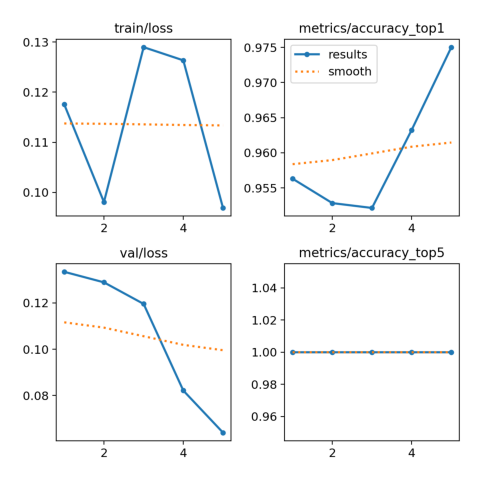

In [17]:
from PIL import Image
img = Image.open("runs/classify/train2/results.png")
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")

In [20]:
import os
import glob

test_image_paths = []
test_base_path = "/content/skin_dataset/test"

# Recursively find all image files in the test directory
for root, _, files in os.walk(test_base_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            test_image_paths.append(os.path.join(root, file))

# Predict on the collected list of image paths
model.predict(
    source=test_image_paths,
    save=True
)


0: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
1: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
2: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
3: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
4: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
5: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
6: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
7: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
8: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
9: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
10: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
11: 224x224 Basal Cell Carcinoma 0.99, Melanoma 0.01, 0.3ms
12: 224x224 Basal Cell Carcinoma 0.99, Melanoma 0.01, 0.3ms
13: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
14: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
15: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0.00, 0.3ms
16: 224x224 Basal Cell Carcinoma 1.00, Melanoma 0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Basal Cell Carcinoma', 1: 'Melanoma'}
 obb: None
 orig_img: array([[[116, 108, 115],
         [116, 108, 115],
         [116, 108, 115],
         ...,
         [131, 116, 114],
         [131, 116, 114],
         [131, 116, 114]],
 
        [[116, 108, 115],
         [116, 108, 115],
         [117, 109, 116],
         ...,
         [131, 116, 114],
         [131, 116, 114],
         [131, 116, 114]],
 
        [[117, 109, 116],
         [117, 109, 116],
         [117, 109, 116],
         ...,
         [132, 117, 115],
         [132, 117, 115],
         [132, 117, 115]],
 
        ...,
 
        [[122, 115, 122],
         [123, 116, 123],
         [123, 116, 123],
         ...,
         [146, 138, 138],
         [145, 137, 137],
         [145, 137, 137]],
 
        [[122, 115, 122],
         [122, 115, 122],
         [123, 116, 123],
         ...,
         [146, 138, 138]

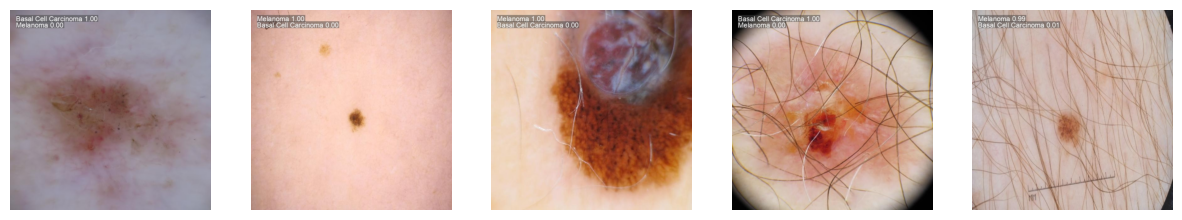

In [21]:
pred_dir = "runs/classify/predict"
imgs = os.listdir(pred_dir)[:5]

plt.figure(figsize=(15,5))
for i, img_name in enumerate(imgs):
    img = Image.open(os.path.join(pred_dir, img_name))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()
